Deep Learning Project 
Name:Akash K
Register No.:24MSP3007

In [ ]:
Project Title:JellyFish Classification Using Deep Learning Techniques

Aim: The aim of this project is to design and implement a deep learning-based image classification model to accurately identify and classify different species of jellyfish from underwater images.

Problem Statement : Given a dataset of jellyfish images belonging to six categories — Moon jellyfish, Barrel jellyfish, Blue jellyfish, Compass jellyfish, Lion’s mane jellyfish, and Mauve stinger jellyfish — the goal is to build a deep learning model to accurately classify images into their respective species. This will help automate jellyfish identification, supporting marine biodiversity monitoring and ecological research.

In this Project 2 Different Models were built for classifying the Jelly fish based on its images. One was a Simple Artificial Neural Network model which was built using fully connected Layers. Another one was built using Convolutional Neural Networks. ANN:
Input layer : 1 
Hidden layers : 5
Dropout layers : 2 
Output layer : 1 
CNN:
Input layer: 1 
Convolutional layers: 4 
Pooling layers: 4 (MaxPooling2D layers after each Conv2D) 
Fully connected (Dense) layers: 3 
Dropout layers: 2 (with rate 0.2)
Output layer: 1

In [ ]:
#Import required Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [3]:
#Prepare the Images for the Model
train_gen=ImageDataGenerator(rescale=1./255)

In [4]:
train_batch=train_gen.flow_from_directory('/kaggle/input/jellyfish/Train_Test_Valid/Train',
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode='categorical')
val_batch=train_gen.flow_from_directory('/kaggle/input/jellyfish/Train_Test_Valid/valid',
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode='categorical')
test_batch=train_gen.flow_from_directory('/kaggle/input/jellyfish/Train_Test_Valid/test',
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode='categorical')

Found 900 images belonging to 6 classes.
Found 39 images belonging to 6 classes.
Found 40 images belonging to 6 classes.


In [14]:
#Build the Artificial Neural Network Model
Ann_model=Sequential([Flatten(input_shape=(64,64,3)),
                      Dense(256,activation='relu'),
                      Dense(128,activation='relu'),
                      Dropout(0.2),
                      Dense(64,activation='relu'),
                      Dense(32,activation='relu'),
                      Dropout(0.2),
                      Dense(16,activation='relu'),
                      Dense(6,activation='softmax')])
Ann_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │       3,145,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 6)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,189,846 (12.17 MB)

 Trainable params: 3,189,846 (12.17 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#Compile the ANN model
Ann_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
#Train the model
Ann_model.fit(train_batch,epochs=20,verbose=1,validation_data=val_batch)

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.1596 - loss: 2.5739 - val_accuracy: 0.2308 - val_loss: 1.7418
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.2053 - loss: 1.8615 - val_accuracy: 0.2564 - val_loss: 1.7428
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2243 - loss: 1.7669 - val_accuracy: 0.2308 - val_loss: 1.7422
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.2798 - loss: 1.7188 - val_accuracy: 0.3333 - val_loss: 1.7216
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2758 - loss: 1.7143 - val_accuracy: 0.2564 - val_loss: 1.6328
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.2987 - loss: 1.6472 - val_accuracy: 0.3333 - val_loss: 1.5866
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.3286 - loss: 1.5948 - val_accuracy: 0.2564 - val_loss: 1.5655
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.3576 - loss: 1.5650 - val_accuracy: 0.2051 - 

In [17]:
#Evaluate the model
loss,accuraccy=Ann_model.evaluate(test_batch)
print('Testing Accuracy : ',accuraccy)
print('Loss : ',loss)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5646 - loss: 1.2602
Testing Accuracy :  0.550000011920929
Loss :  1.2765897512435913


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


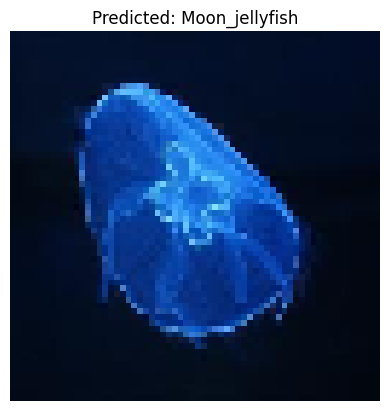

In [18]:
#Prediction for testing data
img_path = '/kaggle/input/jellyfish/Moon_jellyfish/01.jpg'
img = image.load_img(img_path, target_size=(64, 64))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) 
img_array /= 255.
prediction = Ann_model.predict(img_array)
class_labels = ['Moon_jellyfish', 'barrel_jellyfish', 'blue_jellyfish',
                'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish']
predicted_class_indices = np.argmax(prediction, axis=1)
predicted_classes = [class_labels[idx] for idx in predicted_class_indices]
plt.imshow(img)
plt.title(f"Predicted: {predicted_classes[0]}")
plt.axis('off')
plt.show()

In [20]:
#Save the Model
Ann_model.save('/kaggle/working/jellyfish_classifier_ann.h5')

In [21]:
#Building the  CNN model
model=Sequential([Conv2D(32,3,activation='relu',padding='same',input_shape=(64,64,3)),
                 MaxPooling2D(),
                 Conv2D(64,3,activation='relu'),
                 MaxPooling2D(),
                 Conv2D(128,3,activation='relu'),
                 MaxPooling2D(),
                 Conv2D(256,3,activation='relu'),
                 MaxPooling2D(),
                 Flatten(),
                 Dense(128,activation='relu'),
                 Dropout(0.2),
                 Dense(64,activation='relu'),
                 Dropout(0.2),
                 Dense(32,activation='relu'),
                 Dense(6,activation='softmax')])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 530,150 (2.02 MB)

 Trainable params: 530,150 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(train_batch,epochs=25,verbose=1,validation_data=val_batch)

Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.1653 - loss: 1.7924 - val_accuracy: 0.3077 - val_loss: 1.7547
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.2475 - loss: 1.7449 - val_accuracy: 0.2821 - val_loss: 1.5558
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.2404 - loss: 1.6851 - val_accuracy: 0.4103 - val_loss: 1.4031
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.3205 - loss: 1.5585 - val_accuracy: 0.4359 - val_loss: 1.3485
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.3377 - loss: 1.5279 - val_accuracy: 0.3333 - val_loss: 1.3211
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.3031 - loss: 1.5467 - val_accuracy: 0.3590 - val_loss: 1.2811
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.3821 - loss: 1.4223 - val_accuracy: 0.3846 - val_loss: 1.2479
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.4606 - loss: 1.3549 - val_accuracy: 0.

In [24]:
loss,accuraccy=model.evaluate(test_batch)
print('Testing Accuracy : ',accuraccy)
print('Loss : ',loss)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7667 - loss: 1.0689 
Testing Accuracy :  0.7749999761581421
Loss :  1.052318811416626


In [25]:
#Save Model
model.save('/kaggle/working/jellyfish_classifier_cnn.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


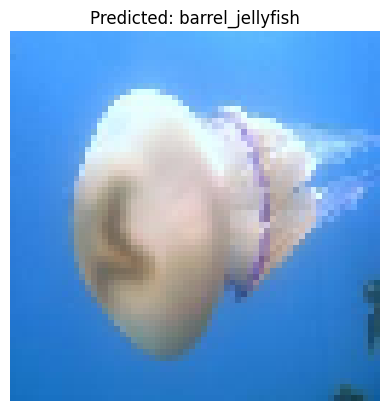

In [26]:
#Prediction for testing Data
img_path = '/kaggle/input/jellyfish/Train_Test_Valid/test/barrel_jellyfish/16.jpg'
img = image.load_img(img_path, target_size=(64, 64))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) 
img_array /= 255.
prediction = model.predict(img_array)
class_labels = ['Moon_jellyfish', 'barrel_jellyfish', 'blue_jellyfish',
                'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish']
predicted_class_indices = np.argmax(prediction, axis=1)
predicted_classes = [class_labels[idx] for idx in predicted_class_indices]
plt.imshow(img)
plt.title(f"Predicted: {predicted_classes[0]}")
plt.axis('off')
plt.show()